# Lab 1


## Imports

In [69]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## Normal Distribution

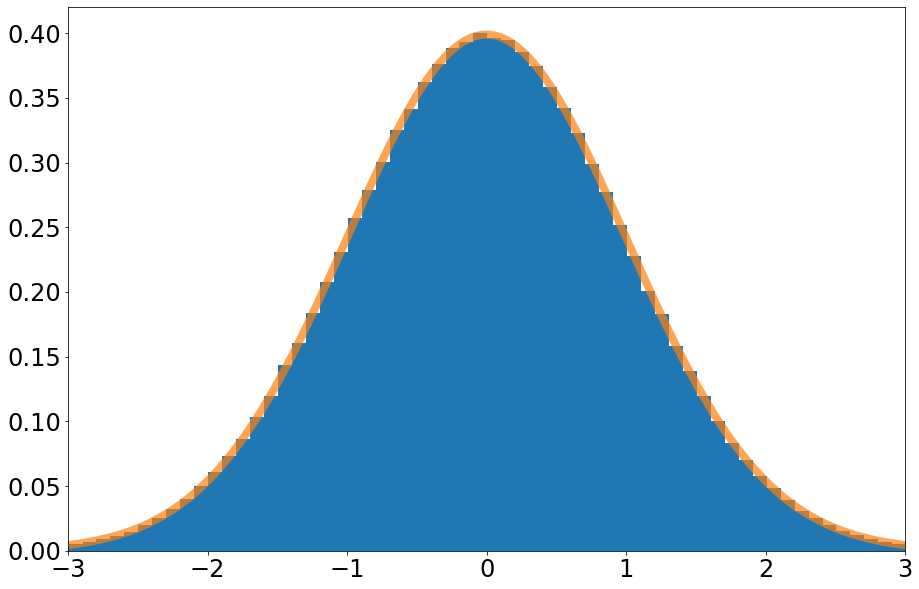

In [70]:
d = stats.norm.rvs(loc = 0., scale = 1, size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-3,3])
x = np.linspace(-3,3,1000)
ax.plot(x,stats.norm.pdf(x,loc = 0., scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

The CDF of x is the integral of the PDF from negative infinity to x 

In [71]:
for i in range(-3, 3):
    print(f'z-score of {i:>2} has a CDF of: {stats.norm.cdf(i):.4f}')


z-score of -3 has a CDF of: 0.0013
z-score of -2 has a CDF of: 0.0228
z-score of -1 has a CDF of: 0.1587
z-score of  0 has a CDF of: 0.5000
z-score of  1 has a CDF of: 0.8413
z-score of  2 has a CDF of: 0.9772


The results above match the z-score table 

In [72]:
x = np.linspace(0.1, 0.9, 9)
for i in x:
    print(f'CDF of {i:.2f} has a z-score of: {stats.norm.ppf(i):>6.3f}')

CDF of 0.10 has a z-score of: -1.282
CDF of 0.20 has a z-score of: -0.842
CDF of 0.30 has a z-score of: -0.524
CDF of 0.40 has a z-score of: -0.253
CDF of 0.50 has a z-score of:  0.000
CDF of 0.60 has a z-score of:  0.253
CDF of 0.70 has a z-score of:  0.524
CDF of 0.80 has a z-score of:  0.842
CDF of 0.90 has a z-score of:  1.282


The results above also match the z-score table

## Exponential Distribution

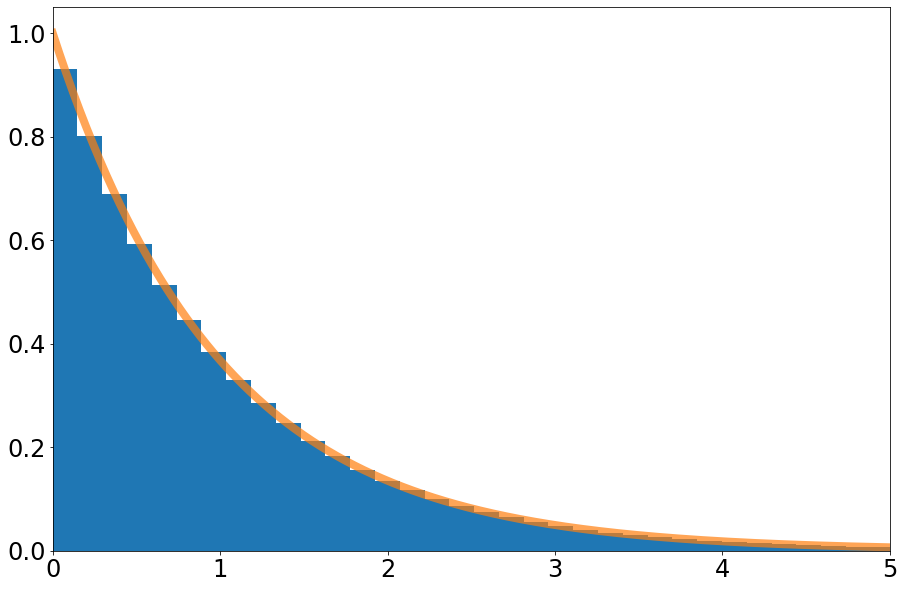

In [73]:
d = stats.expon.rvs(size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.expon.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

The value I chose was 3, and the question I'm asking is "What is the probability that we observe a measurement of 3 or greater, given the background distribution?".

For this we will integrate the PDF from 3 to infinity. $\int_{3}^\infty PDF(x) dx = 1 - \int_{-\infty}^3 PDF(x) dx = 1 - CDF(3)$

And then we can find the inverse of the CDF on a normal distribution to find Sigma 

In [74]:
pval = 1 - stats.expon.cdf(3)
print(f'Probability that measurement of 4 or greater is background: {pval:.4f}')
sigma = stats.norm.ppf(1 - pval)
print(f'Sigma: {sigma:.4f}')

Probability that measurement of 4 or greater is background: 0.0498
Sigma: 1.6469


## Non-continuous binomial distribution
A binomial distribution is the distribution of the number of successes in $\mathbf{n}$ independent events with a probability of $\mathbf{p}$.

The probability of getting k successes is $f(k,n,p)=\binom{n}{k}p^k(1-p)^{n-k}$. When the number of successes is plotted for all $k \in n$ we get a binomial distribution.


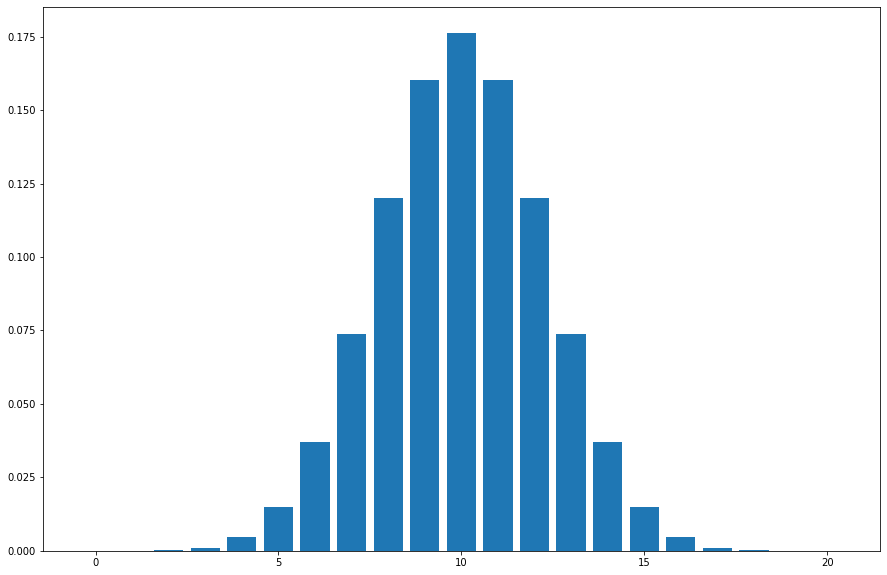

In [76]:
n = 20
p = 0.5

d = [stats.binom.pmf(r, n, p) for r in r_values ] 
r_values = list(range(n + 1)) 

plt.bar(r_values, d)
plt.show()

In the chart above the probability of success is 50% and there are 20 events. This shows that the odds of acheiving exactly 10 successes is the highest.

In this situation a hypothetical question could be asked "What is the probability that when there is a 50% chance of success for 20 events, there will be 15 successes?"

This would correspond to the probability at k = 15.

In [80]:
print(f'The probability of 15 successes: {d[15]:.4f}')

The probability of 15 successes: 0.0148


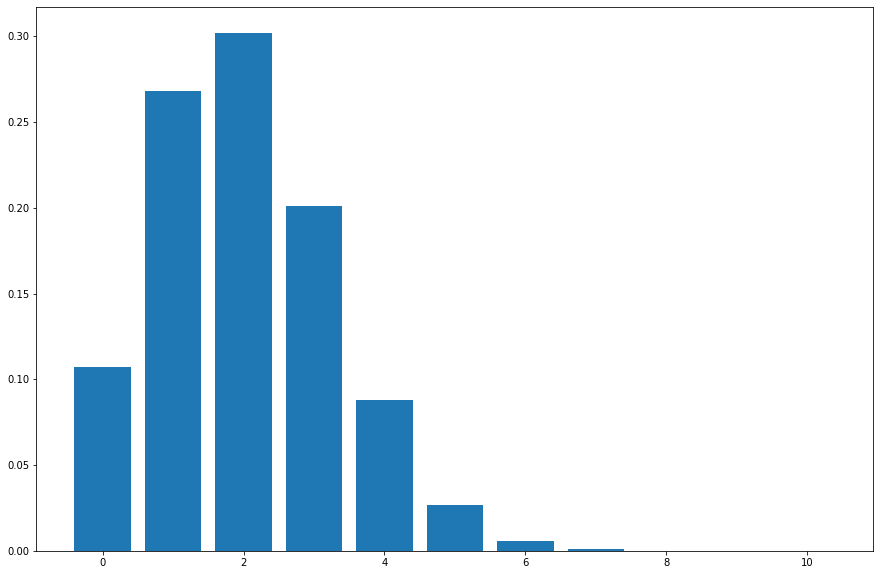

In [82]:
n = 10
p = 0.2

d = [stats.binom.pmf(r, n, p) for r in r_values ] 
r_values = list(range(n + 1)) 

plt.bar(r_values, d)
plt.show()

In the chart above the probability of success is 20% and there are 10 events. This shows that the odds of acheiving exactly 2 successes is the highest.

In this situation a hypothetical question could be asked "What is the probability that when there is a 20% chance of success for 10 events, there will be 8 successes?"

This would correspond to the probability at k = 8.

In [86]:
print(f'The probability of 8 successes: {d[8]:.6f}')

The probability of 8 successes: 0.000074


In any binomial distribution, all the probabilities of k in n sum to 1. But unlike a continuous distribution, the sum of the probability isn't an integral because it is discrete, instead it is just a summation. Similarly, each k has a discrete 'sigma' value associated.

Lastly, the parameters aren't discrete because while the number of events is discrete, which causes the distribution to be discrete, the factors that control the events success or failure, the $p$, is continuous.